<a href="https://colab.research.google.com/github/vksyr/IST718/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import math

import pandas as pd

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

import plotly as py
import plotly.graph_objects as go

In [0]:
# Dataset was converted to CSV with this script: 
# https://pjreddie.com/projects/mnist-in-csv/
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("/content/drive/My Drive/IST718/HW3/train-images-idx3-ubyte", "/content/drive/My Drive/IST718/HW3/train-labels-idx1-ubyte",
        "/content/drive/My Drive/IST718/HW3/mnist_train.csv", 60000)
convert("/content/drive/My Drive/IST718/HW3/t10k-images-idx3-ubyte", "/content/drive/My Drive/IST718/HW3/t10k-labels-idx1-ubyte",
        "/content/drive/My Drive/IST718/HW3/mnist_test.csv", 10000)

In [0]:
# create pandas df
cols = np.array(['label'])
for i in range(1,785):
  cols = np.append(cols, ['pixel' + str(i)])

train_images = pd.read_csv('/content/drive/My Drive/IST718/HW3/mnist_train.csv', 
                          header=None, names=cols)
test_images = pd.read_csv('/content/drive/My Drive/IST718/HW3/mnist_test.csv', 
                          header=None, names=cols)

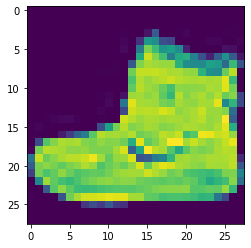

Label: 9


In [14]:
# plotting an image
import matplotlib.pyplot as plt
image = np.asarray(train_images.loc[0][1:]).squeeze()
plt.imshow(image.reshape(28, 28, 1).squeeze())
plt.show()

print('Label: ' + str(train_images.loc[0][0]))

In [0]:
# how many categories?
from collections import Counter
Counter(train_images.iloc[:,0])

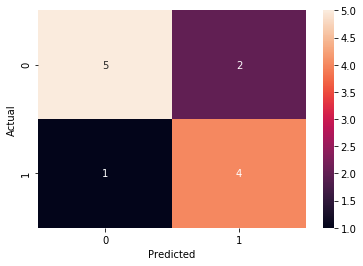

In [20]:
'''
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=20)
fig.show()
'''

fig = go.FigureWidget(data=[go.Histogram(x=train_images.loc[0],
                                            nbinsx=10)],
                         layout=go.Layout(xaxis={'range': [0, 10]},
                                          bargap=0.05))

fig.show()

Tensorflow

In [38]:
%tensorflow_version 1.x  #gpu
import tensorflow as tf
tf.compat.v1.disable_eager_execution() 
# needs to be disabled for placeholder
# enabled for iteration

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x  #gpu`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [39]:
from tensorflow.examples.tutorials.mnist import input_data

# Read data, converts to dataset type for model
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
image_size = 28
labels_size = 10
learning_rate = 0.05
steps_number = 1000
batch_size = 100

# Define placeholders
training_data = tf.placeholder(tf.float32, [None, image_size*image_size])
labels = tf.placeholder(tf.float32, [None, labels_size])

# Variables to be tuned
W = tf.Variable(tf.truncated_normal([image_size*image_size, labels_size], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[labels_size]))

# Build the network (only output layer)
output = tf.matmul(training_data, W) + b

# Define the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=output))

# Training step
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [6]:
# Run the training
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(steps_number):
  # Get the next batch
  input_batch, labels_batch = mnist.train.next_batch(batch_size)
  feed_dict = {training_data: input_batch, labels: labels_batch}

  # Run the training step
  train_step.run(feed_dict=feed_dict)

  # Print the accuracy progress on the batch every 100 steps
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict=feed_dict)
    print("Step %d, training batch accuracy %g %%"%(i, train_accuracy*100))

Step 0, training batch accuracy 16 %
Step 100, training batch accuracy 84 %
Step 200, training batch accuracy 89 %
Step 300, training batch accuracy 91 %
Step 400, training batch accuracy 80 %
Step 500, training batch accuracy 87 %
Step 600, training batch accuracy 90 %
Step 700, training batch accuracy 85 %
Step 800, training batch accuracy 94 %
Step 900, training batch accuracy 90 %


In [7]:
# Evaluate on the test set
test_accuracy = accuracy.eval(feed_dict={training_data: mnist.test.images, labels: mnist.test.labels})
print("Test accuracy: %g %%"%(test_accuracy*100)) # 89.83%

Test accuracy: 89.85 %


TF model was produced using two convolution layers

In [40]:
# WEIGHT INITIALIZATION
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# CREATE CONVOLUTION AND POOLING LAYERS
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# FIRST CONVOLUTION LAYER
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1]) # BASE IMAGE SIZE OF 28 * 28

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)  # RESULTING IMAGE SIZE IS 14 * 14

# SECOND CONOLUTION LAYER 
# MORE THAN ONE LAYER?  DEEP LEARNING
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#FULLY CONNECTED LAYER - BEFORE OUTPUT
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)  # ADD THE RECTIFIED LINEAR UNIT

# DROP LAYER - REDUCE OVERFITTING
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# LAST LAYER - OUTPUT
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
# RUN THE MODEL
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={
          x: batch[0], y_: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
  
  #43s on gpu, 0.9908 acc

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training accuracy 0.2
step 100, training accuracy 0.84
step 200, training accuracy 0.88
step 300, training accuracy 0.96
step 400, training accuracy 0.86
step 500, training accuracy 0.94
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 1
step 1000, training accuracy 1
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.94
step 1900, training accuracy 0.92
step 2000, training accuracy 0.96
step 2100, training accuracy 0.96
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, trai

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [53]:
# confusion matrix
confusion = tf.confusion_matrix(labels=mnist.test, predictions=y_, num_classes=10)


TypeError: ignored

Keras

In [0]:
# load train and test dataset
# functions from https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
	pyplot.show()

def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

> 91.583
> 90.875
> 91.558
> 90.892
> 90.833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

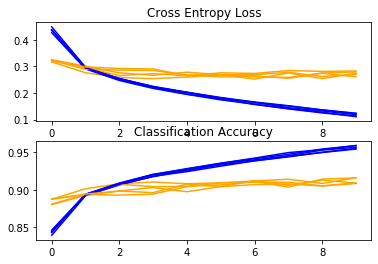

Accuracy: mean=91.148 std=0.346, n=5


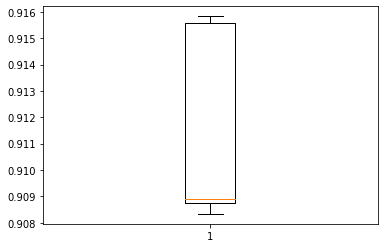

In [28]:
# run
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

# time: 1445s
# 91.148 std=0.346, n=5

In [10]:
# add padded convolutions and rerun
# time: 1503s
# mean acc: 91.07

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

4423680/4422102 [==============================] - 1s 0us/step




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







> 90.667


KeyboardInterrupt: ignored

In [15]:
# add filters and rerun
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

# 2397s cpu=none, 318s cpu=gpu
# mean acc: 91.175

KeyboardInterrupt: ignored